# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [15]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

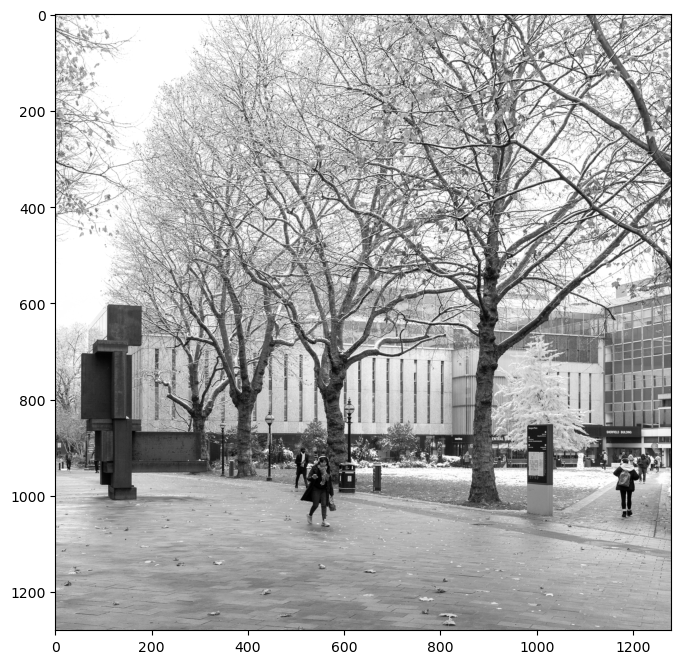

In [30]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

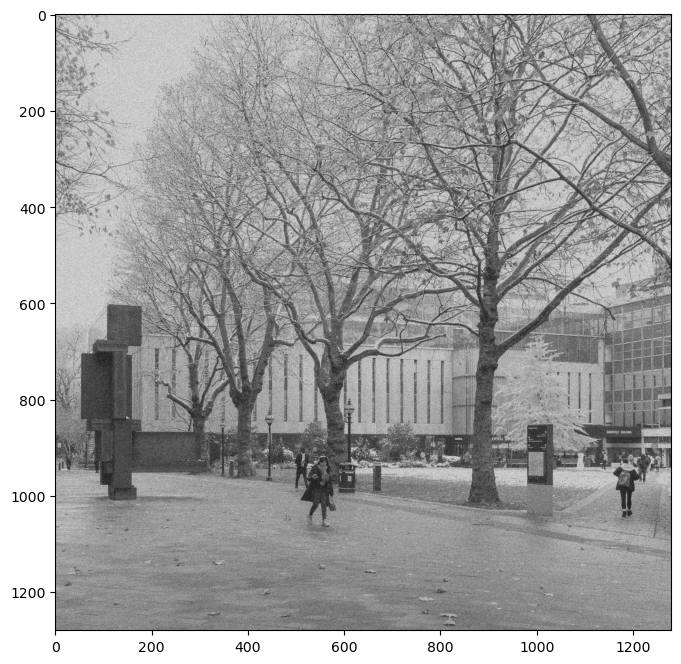

In [31]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


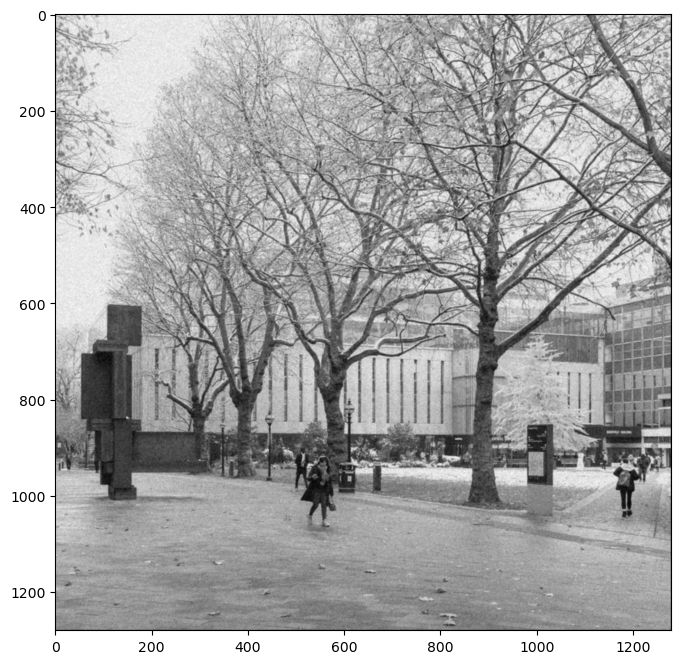

In [32]:
# Design the filter h
### Insert your code ###
h = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


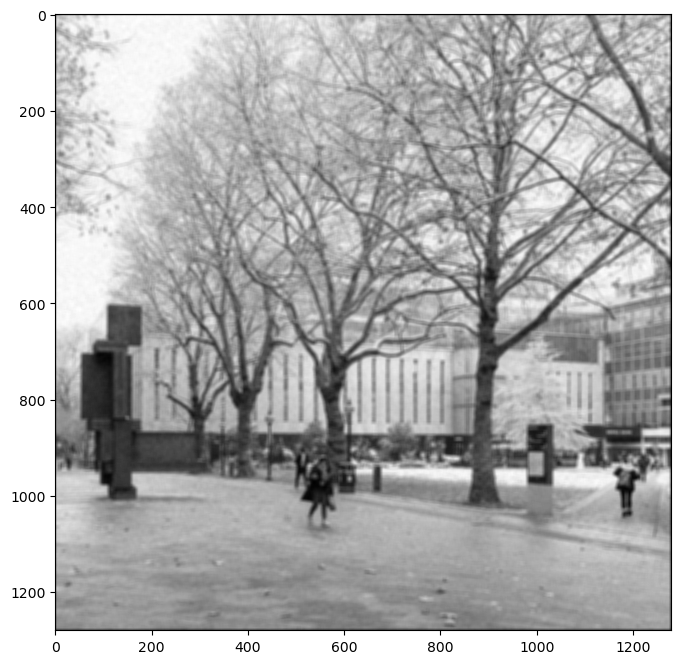

In [35]:
# Design the filter h
### Insert your code ###

size = 9
h = np.ones((size, size)) / (size * size)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

### Insert your answer ###

* Uses 3x3 moving average filter blurs the image slightly.
* Use 11x11 moving average filter blurs the image more significantly.

* Larger kernel size results in more significant blurring of image, while smaller kernel size filter preserves more fine details.


## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


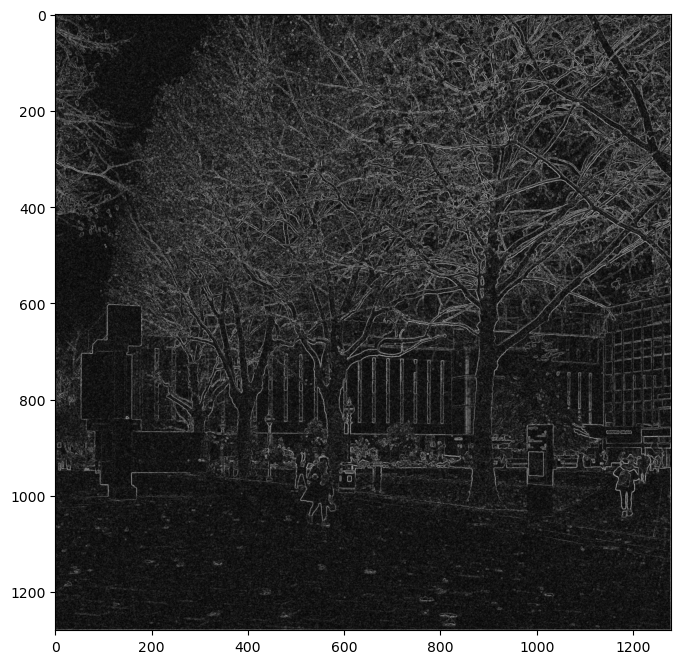

In [36]:
# Design the filters
### Insert your code ###
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

# Image filtering
### Insert your code ###
image_filtered_x = scipy.signal.convolve2d(image_noisy, sobel_x, mode='same')
image_filtered_y = scipy.signal.convolve2d(image_noisy, sobel_y, mode='same')

# Calculate the gradient magnitude
### Insert your code ###
grad_mag = np.sqrt(image_filtered_x ** 2 + image_filtered_y ** 2)

# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

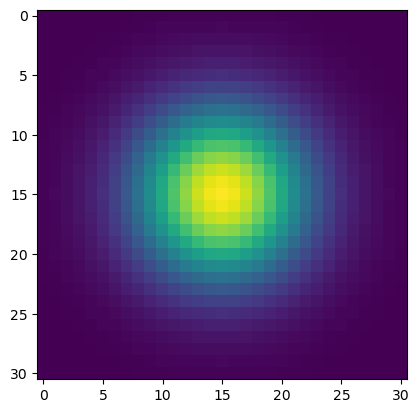

In [37]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    ### Insert your code ###
    k = 3
    size = int(2 * np.ceil(k * sigma) + 1)
    size_half = size // 2
    h = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = i - size_half
            y = j - size_half
            h[i, j] = (1 / (2 * math.pi * sigma ** 2)) * math.exp(-((x ** 2 + y ** 2) / (2 * sigma ** 2)))
    h = h / np.sum(h)

    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Time taken: 2.362905502319336 Seconds


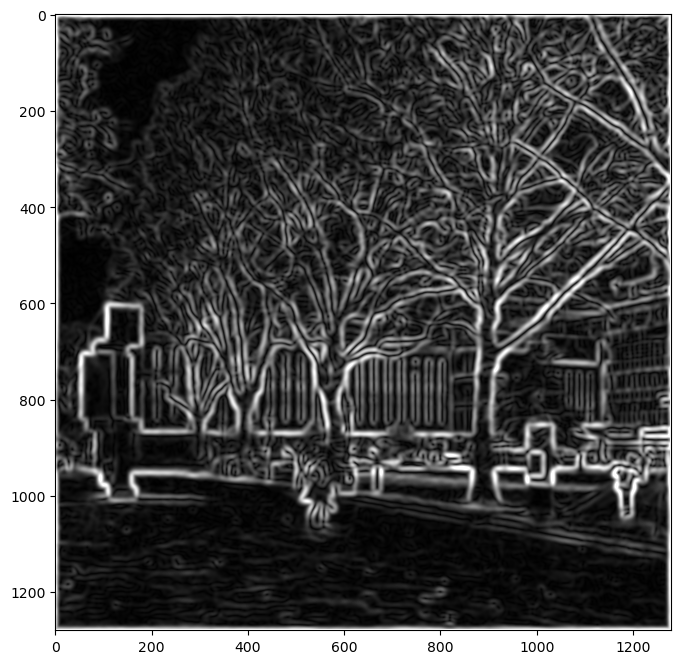

In [38]:
# Construct the Gaussian filter
### Insert your code ###

gaussian_filter = gaussian_filter_2d(5)

# Perform Gaussian smoothing and count time
### Insert your code ###

start_time = time.time()
image_filtered = scipy.signal.convolve2d(image_noisy, gaussian_filter, mode='same')
end_time = time.time()
filter_time_nonseparable = end_time - start_time
print("Time taken:", end_time - start_time, "Seconds")


# Image filtering
### Insert your code ###

# Use sobel filter
image_filtered_x = scipy.signal.convolve2d(image_filtered, sobel_x, mode='same')
image_filtered_y = scipy.signal.convolve2d(image_filtered, sobel_y, mode='same')


# Calculate the gradient magnitude
### Insert your code ###

grad_mag = np.sqrt(image_filtered_x ** 2 + image_filtered_y ** 2)


# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

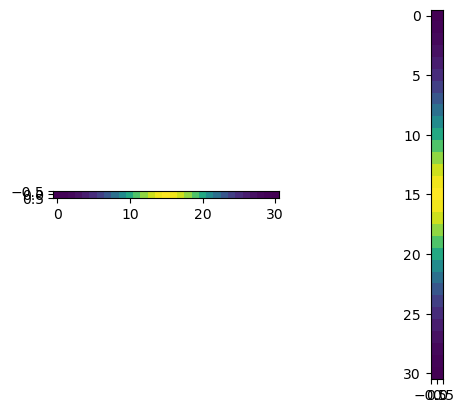

In [39]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    ### Insert your code ###
    k = 3
    size = 2 * k * sigma + 1
    size_half = size // 2
    h = np.zeros(size)
    for i in range(size):
        x = i - size_half
        h[i] = (1 / (((2 * math.pi) ** (1 / 2)) * sigma) * math.exp(-((x ** 2) / (2 * sigma ** 2))))
    h = h / np.sum(h)
    return h

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x = gaussian_filter_1d(sigma).reshape(1, -1)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = h_x.transpose()
# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.5 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Time taken: 0.2537386417388916 Seconds
Separable filtering is 9.31x faster.
Mean difference: 4.253901101210767e-13


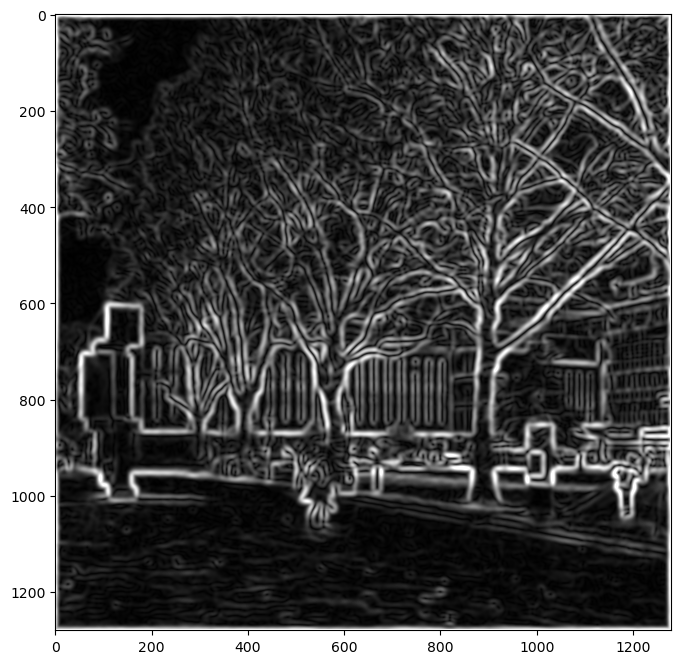

In [ ]:
# Perform separable Gaussian smoothing and count time
### Insert your code ###

start_time = time.time()
# Perform separable Gaussian smoothing
image_filtered_x = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
image_filtered = scipy.signal.convolve2d(image_filtered_x, h_y, mode='same')
end_time = time.time()
filter_time_separable = end_time - start_time
print("Time taken:", filter_time_separable, "Seconds")
speedup = (filter_time_nonseparable / filter_time_separable)
print(f"Separable filtering is {speedup:.2f}x faster.")


# Image filtering
### Insert your code ###

# Use sobel filters
image_filtered_x = scipy.signal.convolve2d(image_filtered, sobel_x, mode='same')
image_filtered_y = scipy.signal.convolve2d(image_filtered, sobel_y, mode='same')

# Calculate the gradient magnitude
### Insert your code ###
grad_mag2 = np.sqrt(image_filtered_x ** 2 + image_filtered_y ** 2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
### Insert your code ###
mean_diff = np.mean(np.abs(grad_mag - grad_mag2))
print("Mean difference:", mean_diff)

### 2.6 Comment on the Gaussian + Sobel filtering results and the computational time.

### Insert your answer ###

* Result:
Both methods achieved the same effect of filtering, producing almost identical images since a 2D Gaussian filter is mathematically separable into two 1D filters, ensuring the output remains the same aside from minor floating-point differences.

* Computational Time:
Using 2D gaussian filter + sobel filter takes around 2.36 seconds.
Using 2 separate 1D gaussian smoothing + sobel filter takes only 0.25 seconds.
So breaking the filter into two separate filers along different dimensions reduces the computational complexity and runs faster.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [41]:
# Import libaries (provided)
import torch
import torch.nn as nn

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [42]:
# Expand the dimension of the numpy array
### Insert your code ###
expanded_image = np.expand_dims(image, axis=[0, 1])

# Convert to a Pytorch tensor using torch.from_numpy
### Insert your code ###
tensor_image = torch.from_numpy(expanded_image.copy())  

print(tensor_image.shape)

torch.Size([1, 1, 1280, 1280])


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

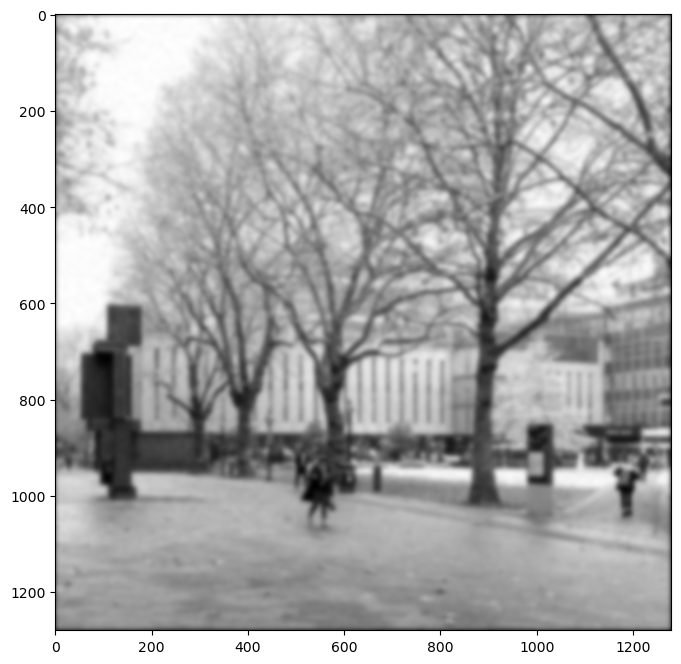

In [43]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
# h is now a 2D numpy array

# Create the Conv2D filter
### Insert your code ###

# Convert the numpy array to a Pytorch tensor
weight = torch.from_numpy(h).float().unsqueeze(0).unsqueeze(0)
# Create a Conv2D layer with 1 input channel, 1 output channel, kernel size of h.shape, padding of h.shape // 2, and no bias
conv2d = nn.Conv2d(1, 1, kernel_size=(h.shape[0], h.shape[1]), padding=(h.shape[0] // 2, h.shape[1] // 2), bias=False)
# Assign the weight to the Conv2D layer
with torch.no_grad():
    conv2d.weight.copy_(weight)


# Filtering
### Insert your code ###
filtered_image = conv2d(tensor_image.float())

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

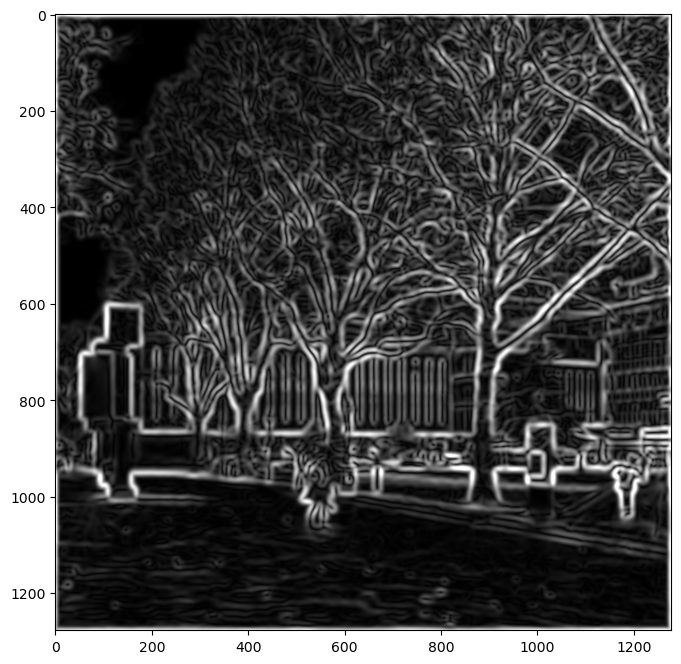

In [45]:
# Create Conv2D filters
### Insert your code ###

# Convert the numpy arrays to Pytorch tensors for kernel weights
weight_x = torch.from_numpy(sobel_x).float().unsqueeze(0).unsqueeze(0)
weight_y = torch.from_numpy(sobel_y).float().unsqueeze(0).unsqueeze(0)

# Create Conv2D layers with 1 input channel, 1 output channel, kernel size of sobel_x.shape, and no bias
conv2d_x = nn.Conv2d(1, 1, kernel_size=(sobel_x.shape[0], sobel_x.shape[1]), bias=False)
# Create Conv2D layers with 1 input channel, 1 output channel, kernel size of sobel_y.shape, and no bias
conv2d_y = nn.Conv2d(1, 1, kernel_size=(sobel_y.shape[0], sobel_y.shape[1]), bias=False)

# Assign the weights to the Conv2D layers
with torch.no_grad():
    conv2d_x.weight.copy_(weight_x)
    conv2d_y.weight.copy_(weight_y)


# Perform filtering
### Insert your code ###
filtered_image_x = conv2d_x(filtered_image)
filtered_image_y = conv2d_y(filtered_image)

# Calculate the gradient magnitude map
### Insert your code ###
grad_mag3 = torch.sqrt(filtered_image_x ** 2 + filtered_image_y ** 2).squeeze().detach().numpy()


# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)